<a href="https://colab.research.google.com/github/AkshayKohad/Optimization-for-Vehicle-Routing-Problem-using-Genetic-Algorithms.ipynb/blob/main/Genetic_Algos_Vehicle_Routing_Problem_Solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
!pip install matplotlib deap

In [67]:
#Required Libraries
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import numpy as np

In [68]:
# Define the number of locations and vehicles
# Define the number of locations
num_locations = 20

# Create a list of tuples representing location coordinates - try to use a random number generator
locations = [(random.randint(0,100), random.randint(0,100)) for _ in range(num_locations)]

# Define the coordinates for the depot
depot = (50,50)

# Define the number of vehicles
num_vehicles = 3

In [69]:
# Genetic Algorithm Setup
# Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
# Define individual structure. Individuals are lists with a fitness attribute.
creator.create("Individual", list, fitness=creator.FitnessMin)

In [70]:
# Setting up the individuals and population
# Initialize the toolbox
toolbox = base.Toolbox()
#finish defining how to select indices
toolbox.register("indices", random.sample, range(num_locations), num_locations)
#finish defining how to build an individual
toolbox.register("individual",tools.initIterate, creator.Individual, toolbox.indices)
#finish defining how to build a population
toolbox.register("population",tools.initRepeat, list, toolbox.individual)


In [71]:
# Fitness Function
def evalVRP(individual):
    # Writing the fitness evaluation function
    total_distance=0
    # Create a list to store distances of each vehicle
    distances_vehicles=[]
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
      vehicle_route = []
      vehicle_route.append(depot)
      for j in range(i,num_locations,num_vehicles):
        vehicle_route.append(locations[individual[j]])
      vehicle_route.append(depot)

      vehicle_distance=0
      # Calculate total distance traveled by the vehicle
      for j in range(len(vehicle_route)-1):
        vehicle_distance += ((vehicle_route[j][0]-vehicle_route[j+1][0])**2 + (vehicle_route[j][1]-vehicle_route[j+1][1])**2)**0.5

      total_distance += vehicle_distance

      distances_vehicles.append(vehicle_distance)



    #Use  total distance of routes and standard deviation of distances as a penalty for imbalance among vehicles
    distance_uniformity = np.std(distances_vehicles)

    return total_distance, distance_uniformity



In [72]:
#Configure the genetic operators
toolbox.register("evaluate", evalVRP)
# Register the crossover function suitable for permutation-based representation
toolbox.register("mate",tools.cxPartialyMatched)
# Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("mutate",tools.mutShuffleIndexes, indpb=0.05)
# Register the selection function using tournament selection
toolbox.register("select",tools.selTournament, tournsize=3)


In [73]:
# Plotting function to visualize the routes - just plot the points and lines for each vehicle
def plot_routes(individual, title="Routes"):

     plt.figure()
    # Plot locations as blue dots and the depot as a red square
     for (x, y) in locations:
        plt.plot(x, y, 'bo')

     plt.plot(depot[0], depot[1], 'rs')

    # Plot routes as lines between each location

     for i in range(num_vehicles):
      vehicle_route = []
      vehicle_route.append(depot)
      for j in range(i,num_locations,num_vehicles):
        vehicle_route.append(locations[individual[j]])
      vehicle_route.append(depot)
      plt.plot(*zip(*vehicle_route), '-')


     plt.title(title)
     plt.xlabel('X Coordinate')
     plt.ylabel('Y Coordinate')
     plt.show()


gen	nevals	avg    	min    
0  	300   	577.221	3.91446
1  	232   	553.377	4.177  
2  	224   	544.815	1.74084
3  	247   	538.572	0.606048
4  	213   	524.552	1.68144 
5  	236   	523.453	0.860313
6  	236   	525.761	2.09759 
7  	233   	523.385	6.7411  
8  	244   	519.068	5.71137 
9  	235   	520.208	2.69336 
10 	246   	516.798	2.69336 
11 	238   	513.972	3.34882 
12 	225   	516.784	2.08926 
13 	224   	509.935	2.08926 
14 	222   	508.232	6.62112 
15 	201   	500.203	2.02604 
16 	211   	495.002	2.02604 
17 	228   	490.214	1.99288 
18 	205   	480.573	3.56582 
19 	221   	470.92 	6.55523 
20 	242   	462.311	2.26279 
21 	219   	441.124	5.13112 
22 	237   	419.429	4.32457 
23 	239   	392.821	2.01062 
24 	236   	381.27 	2.01062 
25 	211   	371.42 	5.0855  
26 	250   	360.59 	3.45863 
27 	232   	355.278	5.96571 
28 	218   	348.228	10.3312 
29 	213   	343.26 	6.06926 
30 	217   	343.573	5.75936 
31 	227   	341.958	13.3672 
32 	243   	340.033	4.21913 
33 	237   	338.295	7.51587 
34 	236   	331.881	11.13

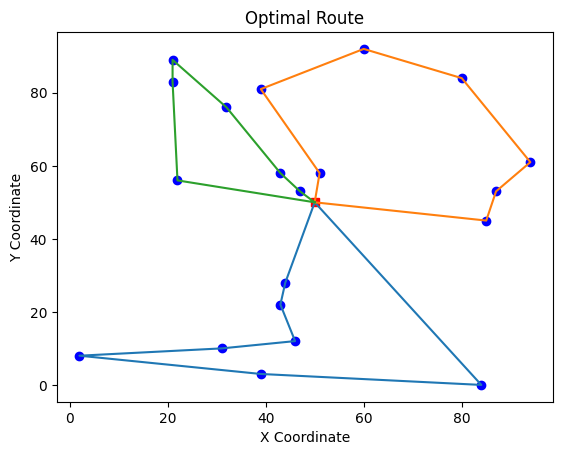

In [74]:
def main():

    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()
